In [179]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import random

sys.path.insert(0,'../')
from nps_model_functions import *
from environment import env
config = env.env()
#sys.path.insert(0,'../03_nps_models')
%cd ../03_nps_models
#%run '05_nltk_model.ipynb'
#%run '06_spacy_model.ipynb'
%cd ../06_nps_evaluation/


/Users/lauralyns/Documents/MADS/SIADS 699 - Capstone/Capstone VS/MADS_Capstone/03_nps_models
/Users/lauralyns/Documents/MADS/SIADS 699 - Capstone/Capstone VS/MADS_Capstone/06_nps_evaluation


/Users/lauralyns/Documents/MADS/SIADS 699 - Capstone/Capstone VS/MADS_Capstone/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
#park_csv_path = '../02_nps_api_data/park_to_parkcode.csv'

In [187]:
test_data = pd.read_csv('../02_nps_api_data/testing_queries.csv')
test_data.columns = ['query', 'intent', 'endpoint', 'parkcode']
test_data.head()

,query,intent,endpoint,parkcode
0,Give me information on De Soto,description,parks,deso
1,Give me information on Bent's Old Fort Nationa...,description,parks,beol
2,Give me information on Vicksburg National Mili...,description,parks,vick
3,Give me information on Appomattox,description,parks,apco
4,Give me information on Dinosaur,description,parks,dino


In [188]:
len(test_data)

888

In [189]:
#smaller test size for now
test_data = test_data.sample(100, random_state=10)

GPT

In [3]:
# Amenities
query = 'List the amenities at Zion'
endpoint, parkcode, intent = nps_model_functions.get_params(query)
print(endpoint, parkcode, intent)


amenities zion amenities


In [190]:
def add_gpt(query_df):
    gpt_df = query_df.apply(lambda x: nps_model_functions.get_params(x['query']), result_type='expand', axis=1)
    gpt_df.columns = ['gpt_endpoint', 'gpt_parkcode', 'gpt_intent']
    query_df = pd.concat([query_df, gpt_df], axis=1)
    #query_df['gpt_endpoint'], query_df['gpt_park_code'],query_df['gpt_intent'] = [nps_model_functions.get_params(x) for x in query_df['query']]
    return query_df

In [191]:
test_data = add_gpt(test_data)
#2m 42s for 100 samples

In [ ]:
#Pause for 61 minutes to rest API - for when full 1k sample size called
time.sleep(3660)

Spacy

In [36]:
# From '06_spacy_model.ipynb'
spacy_model_functions = SpaCyModelFunctions(config, park_csv_path)

In [ ]:
query = 'What state is Green Springs in?'
endpoint, park_code, intent, output = spacy_model_functions.api_call(query)
print(endpoint, park_code, intent, output)

In [204]:
def add_spacy(query_df):
    spacy_model_functions = SpaCyModelFunctions(config, park_csv_path)

    spacy_df = query_df.apply(lambda x: spacy_model_functions.api_call(x['query']), result_type='expand', axis=1)
    spacy_df = spacy_df.iloc[:,:-1]
    spacy_df.columns = ['spacy_endpoint', 'spacy_parkcode', 'spacy_intent']
    query_df = pd.concat([query_df, spacy_df], axis=1)
    
    return query_df

In [192]:
test_data = add_spacy(test_data)
#28.6s for 100 samples

In [193]:
test_data.to_pickle("test.pkl")

In [ ]:
#Pause for 61 minutes to rest API - for when full 1k sample size called
time.sleep(3660)

NLTK

In [ ]:
nltk_model_functions = NLTKModelFunctions(config, park_csv_path)
query = 'What state is Green Springs in?'
endpoint, park_code, intent, output = nltk_model_functions.api_call(query)
print(endpoint, park_code, intent)

In [203]:
test_data.head()

,query,intent,endpoint,parkcode,gpt_endpoint,gpt_parkcode,gpt_intent,spacy_endpoint,spacy_parkcode,spacy_intent
431,Please provide the full name of Fredericksburg...,fullname,parks,frsp,parks,frsp,fullname,parks,frsp,other
349,Please provide the full name of Cane River?,fullname,parks,cari,parks,cari,fullname,Park not found in the query. Please provide a ...,None,None
605,What services are there at Effigy Mounds?,amenities,amenities,efmo,amenities,efmo,amenities,Park not found in the query. Please provide a ...,None,None
192,Where is Rainbow Bridge?,address,parks,rabr,parks,rabr,address,Park not found in the query. Please provide a ...,None,None
849,Does it cost money to visit Fort Stanwix Natio...,feespass,feespasses,fost,fees,fosta,feespass,parks,fost,other


Model Accuracy

In [200]:
def plot_accuracy(df, metric): 
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df[metric], palette='YlGn')
    #sns.barplot(x='RecreationVisits', y='Full_ParkName', data=df, palette='YlGn')
    plt.xlabel('API Model')
    plt.ylabel('Accuracy')
    plt.title(f'Model Accuracy on {metric}')
    plt.show()

/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_66502/1373879499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[metric], palette='YlGn')


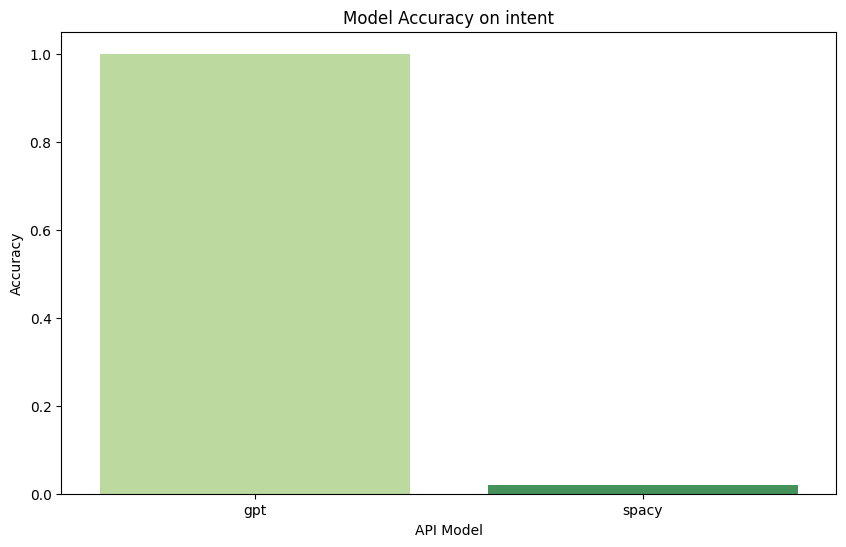

/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_66502/1373879499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[metric], palette='YlGn')


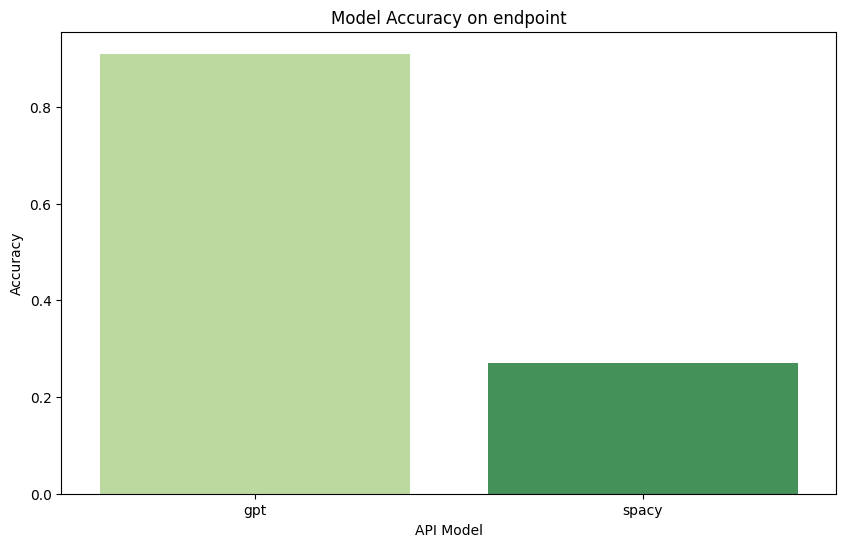

/var/folders/lq/0q3fzmb57s3c187k6gjyx3_00000gn/T/ipykernel_66502/1373879499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[metric], palette='YlGn')


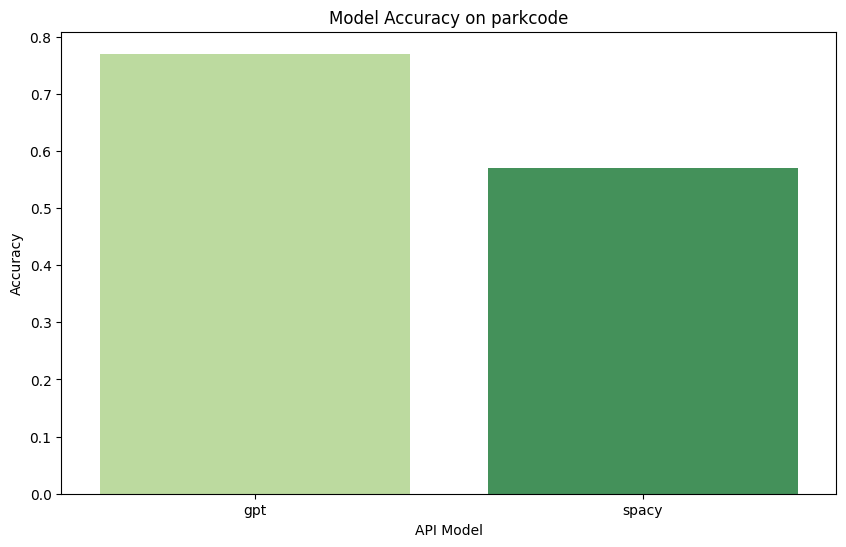

In [201]:
def model_accuracy (df, metrics, models):
    acc_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        for model in models:
            acc_df.loc[model,metric] = len(df.query(f'{metric}=={model}_{metric}'))/len(df)
        plot_accuracy(acc_df, metric)
    return acc_df

accuracy_df = model_accuracy(test_data, ['intent', 'endpoint', 'parkcode'], ['gpt', 'spacy'])#, nltk'])



In [202]:
accuracy_df

,intent,endpoint,parkcode
gpt,1.0,0.91,0.77
spacy,0.02,0.27,0.57


Errors

In [228]:
def top_errors (df, metrics, models):
    errors_df = pd.DataFrame(columns = metrics)
    errors_dict = {}
    for metric in metrics:
        right = '&'.join([f'{metric}=={model}_{metric}' for model in models])
        wrong = '&'.join([f'{metric}!={model}_{metric}' for model in models])
        errors_dict['wrong']=df.query(wrong)
        errors_dict['right']=df.query(right)
        errors_df.loc['total', metric] = len(df)
        errors_df.loc['right', metric] = len(df.query(right))
        errors_df.loc['wrong', metric] = len(df.query(wrong))
    return errors_df, errors_dict
        #errors_df['All Wrong'] = len(df.query(f'{metric}=={model}_{metric}'))
      #      acc_df.loc[model,metric] = len(df.query(f'{metric}=={model}_{metric}'))/len(df)
      #  plot_accuracy(acc_df, metric)

errors, err_dict = top_errors(test_data, ['intent', 'endpoint', 'parkcode'], ['gpt', 'spacy'])#, nltk'])

In [220]:
errors

,intent,endpoint,parkcode
total,100,100,100
right,2,27,47
wrong,0,9,13


In [229]:
err_dict['wrong']

,query,intent,endpoint,parkcode,gpt_endpoint,gpt_parkcode,gpt_intent,spacy_endpoint,spacy_parkcode,spacy_intent
443,Please provide the full name of Canyon de Chelly?,fullname,parks,cach,parks,cach\n,fullname,Park not found in the query. Please provide a ...,None,None
562,What services are there at Adams Park?,amenities,amenities,adam,amenities,adamc,amenities,Park not found in the query. Please provide a ...,None,None
628,What services are there at Sand Creek Massacre?,amenities,amenities,sand,amenities,sandc,amenities,Park not found in the query. Please provide a ...,None,None
181,Where is Santa Monica Mountains?,address,parks,samo,parks,samo\n,address,Park not found in the query. Please provide a ...,None,None
307,Tell me the state Carlsbad is in,state,parks,cave,parks,cave\n,state,Park not found in the query. Please provide a ...,None,None
389,Please provide the full name of Castillo de Sa...,fullname,parks,casa,parks,casa\n,fullname,Park not found in the query. Please provide a ...,None,None
625,What services are there at Santa Monica Mounta...,amenities,amenities,samo,amenities,samo\n,amenities,Park not found in the query. Please provide a ...,None,None
92,Give me information on Saint-Gaudens,description,parks,saga,parks,sagau,description,Park not found in the query. Please provide a ...,None,None
647,What services are there at Saint-Gaudens?,amenities,amenities,saga,amenities,saga\n,amenities,Park not found in the query. Please provide a ...,None,None
500,What alerts are active at Castillo de San Marc...,alerts,alerts,casa,alerts,casa\n,alerts,Park not found in the query. Please provide a ...,None,None


In [231]:
err_dict['right'][['parkcode']]= 

,parkcode
431,frsp
417,cavo
75,tica
174,wwii
740,iatr
520,kala
831,grfa
874,whsa
211,grte
693,fodu


In [227]:
err_dict['wrong'][['parkcode']].value_counts()

parkcode
casa        3
saga        2
samo        2
sand        2
adam        1
bisc        1
cach        1
cave        1
Name: count, dtype: int64

In [218]:
wrong = test_data.query('&'.join([f'{metric}=={model}_{metric}' for model in models]))
wrong

NameError: name 'models' is not defined